In [1]:
import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.ops import unary_union, cascaded_union
import matplotlib.pyplot as plt
import numpy as np
import os


current_dir = os.getcwd()

# Load the police district shapefile
shapefile_path = os.path.join(current_dir, 'Data','portland-police-districts', 'Portland_Police_Districts.shp')
districts = gpd.read_file(shapefile_path)


In [ ]:
import shapely

# portland-police-department shape file
ppd = gpd.read_file(shapefile_path)
ppd = ppd.dissolve()
print(ppd.geometry.geom_type.value_counts())


ppd.geometry = shapely.set_precision(ppd.geometry, grid_size=0.00001)

# To check if any internal boundries are present an adujust grid_size accordingly
# ppd.boundary.plot() 

cell_size = 600 # feet

min_x, min_y, max_x, max_y = ppd.total_bounds  # Bounding box of the ppd
x_coords = np.arange(min_x, max_x, cell_size)
y_coords = np.arange(min_y, max_y, cell_size)

# Generate polygons of equal size for the grid
grid_cells = []
for x in x_coords:
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create a GeoDataFrame for the grid
grid = gpd.GeoDataFrame({"geometry": grid_cells}, crs=ppd.crs)


grid_clipped = gpd.overlay(grid, ppd[['geometry']], how="intersection")
print(grid_clipped.geom_type.value_counts())


grid_clipped["unique_id"] = range(1, len(grid_clipped)+1)
grid_clipped['hotspot'] = 0


# Extract bounds for reference
min_x, min_y, _, _ = grid_clipped.total_bounds

# Function to assign indices to cells
def assign_indices(geometry, cell_size, min_x, min_y):
    # Calculate the x and y indices
    x_index = int((geometry.centroid.x - min_x) // cell_size)
    y_index = int((geometry.centroid.y - min_y) // cell_size)
    return x_index, y_index

# Apply the function to all geometries
grid_clipped["cell_coords"] = grid_clipped.geometry.apply(
    assign_indices, args=(cell_size, min_x, min_y)
)

grid_clipped["x_index"] = grid_clipped["cell_coords"].apply(lambda c: c[0])
grid_clipped["y_index"] = grid_clipped["cell_coords"].apply(lambda c: c[1])

grid_clipped = grid_clipped.drop(columns=["cell_coords"])


grid_clipped["area"] = grid_clipped.geometry.area



MultiPolygon    1
Name: count, dtype: int64
Polygon         52
MultiPolygon    10
Name: count, dtype: int64


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:

grid_clipped.to_file(os.path.join(current_dir, 'Data','grids', str(cell_size), 'crime-forecast-grid.shp'))


## Another methods

In [9]:
def combineShapes(geom):
    if geom.geom_type in ["MultiPolygon", "GeometryCollection"]:
        print(geom)
        return unary_union(geom)
    else:
        return geom

MultiPolygon    1
Name: count, dtype: int64
Polygon         11933
MultiPolygon       52
Name: count, dtype: int64


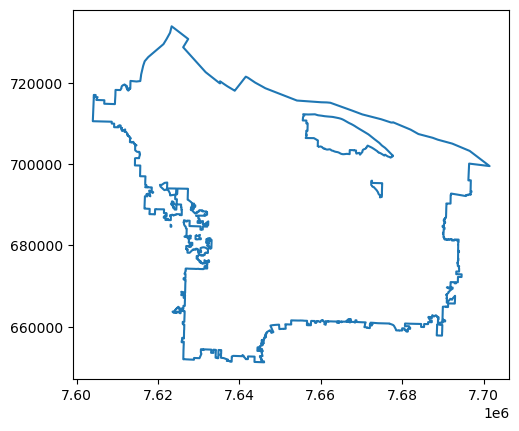

In [ ]:
import shapely
ppd = gpd.read_file(shapefile_path)
ppd = ppd.dissolve()
print(ppd.geometry.geom_type.value_counts())


ppd.geometry = shapely.set_precision(ppd.geometry, grid_size=0.00001)

# check if any internal boundries are present an adujust grid_size accordingly
ppd.boundary.plot()

grid_size = 600 # feet

min_x, min_y, max_x, max_y = ppd.total_bounds  # Bounding box of the ppd
x_coords = np.arange(min_x, max_x, grid_size)
y_coords = np.arange(min_y, max_y, grid_size)

grid_cells = []
for x in x_coords:
    for y in y_coords:
        cell = box(x, y, x + grid_size, y + grid_size)
        grid_cells.append(cell)

# Create a GeoDataFrame for the grid
grid = gpd.GeoDataFrame({"geometry": grid_cells}, crs=ppd.crs)


grid_clipped = gpd.overlay(grid, ppd, how="intersection")
print(grid_clipped.geom_type.value_counts())


grid_clipped["unique_id"] = range(1, len(grid_clipped) + 1)
grid_clipped['hotspot'] = 0

grid_clipped["area"] = grid_clipped.geometry.area

grid_clipped.to_file("../Qgis/self-created-grid/600/crime-forecast-grid-600-overlay.shp")




## Unclipped Grid

<Axes: >

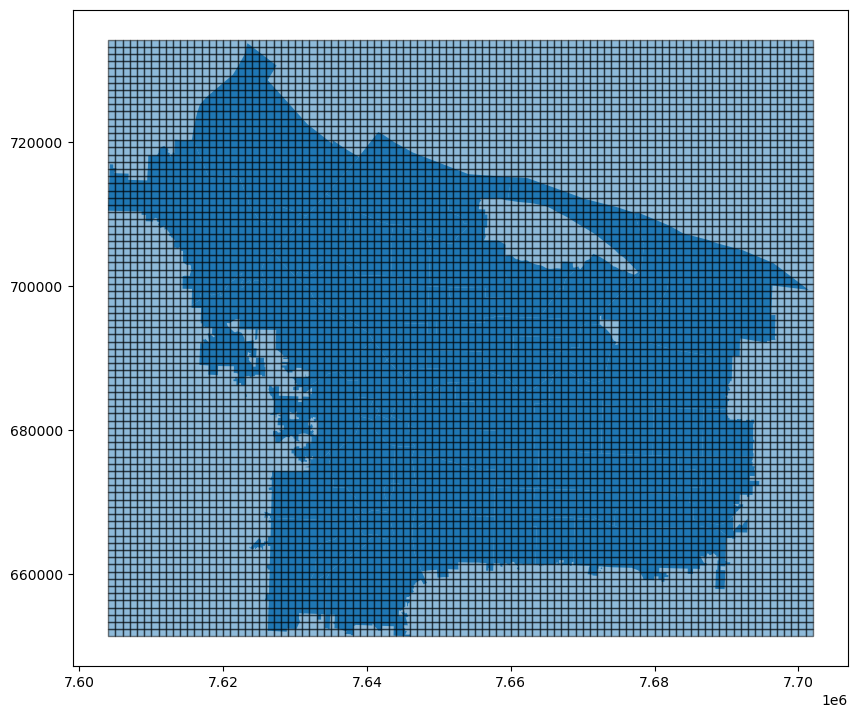

In [9]:
import geopandas as gpd
import numpy as np
from shapely.geometry import box

# Load the Portland Police Department shapefile
# ppd = gpd.read_file("path_to_portland_police_department_shapefile.shp")
ppd = gpd.read_file(shapefile_path)


# Define the grid size in the same units as the shapefile's CRS
cell_size = 1000  # Adjust the size as needed

# Get the bounding box of the shapefile
min_x, min_y, max_x, max_y = ppd.total_bounds

# Generate grid coordinates
x_coords = np.arange(min_x, max_x, cell_size)
y_coords = np.arange(min_y, max_y, cell_size)

# Create grid polygons
grid_cells = []
for x in x_coords:
    for y in y_coords:
        cell = box(x, y, x + cell_size, y + cell_size)
        grid_cells.append(cell)

# Create a GeoDataFrame for the grid
grid = gpd.GeoDataFrame({"geometry": grid_cells}, crs=ppd.crs)

# Save the grid to a shapefile or visualize
# grid.to_file(os.path.join(current_dir, 'Data','grids', 'unclipped', str(cell_size), 'crime-forecast-grid.shp'))

# Optional: Visualize the grid
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (10,10))
ppd.plot(ax = ax)
grid.plot(ax = ax, edgecolor="black", alpha=0.5)

